In [41]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from coffea import processor 
from coffea.util import load, save
import hist
import mplhep as hep
plt.style.use(hep.style.CMS)
from cycler import cycler
import math

In [42]:
year='2018'
hists = load('../hists/bbww'+year+'.scaled')

lumis = { 
    #Values from https://twiki.cern.ch/twiki/bin/viewauth/CMS/PdmVDatasetsUL2016                                                      
    '2016postVFP': 19.5,
    '2016preVFP': 16.8,
    '2017': 41.48,
    '2018': 59.83
    }
lumi=lumis[year]

data={
    '2016preVFP':{
        'msr': 'SingleMuon',
        'esr': 'SingleElectron'
    },
    '2016postVFP':{
        'msr': 'SingleMuon',
        'esr': 'SingleElectron'
    },
    '2017':{
        'msr': 'SingleMuon',
        'esr': 'SingleElectron'
    },
    '2018':{
        'msr': 'SingleMuon',
        'esr': 'EGamma'
    }
}

data_hists   = hists['data']
bkg_hists    = hists['bkg']
signal_hists = hists['sig']


/var/folders/hj/t7nt9g255973s5cwl4skm39m0000gn/T/ipykernel_2958/2390579890.py:47: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


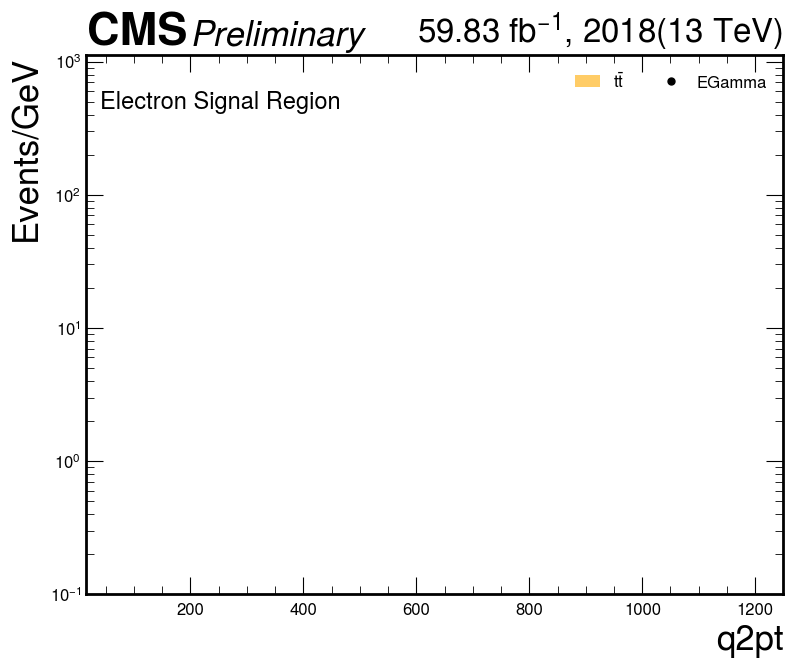

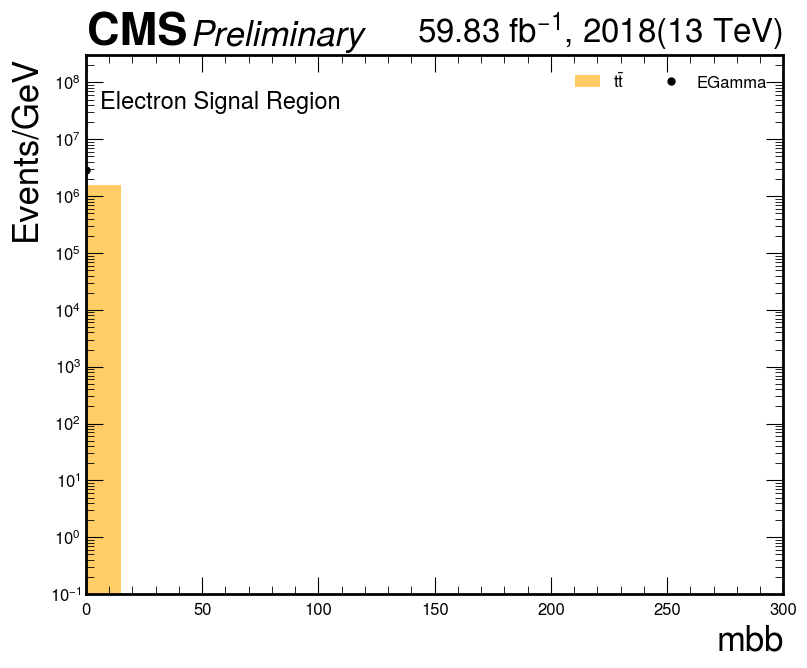

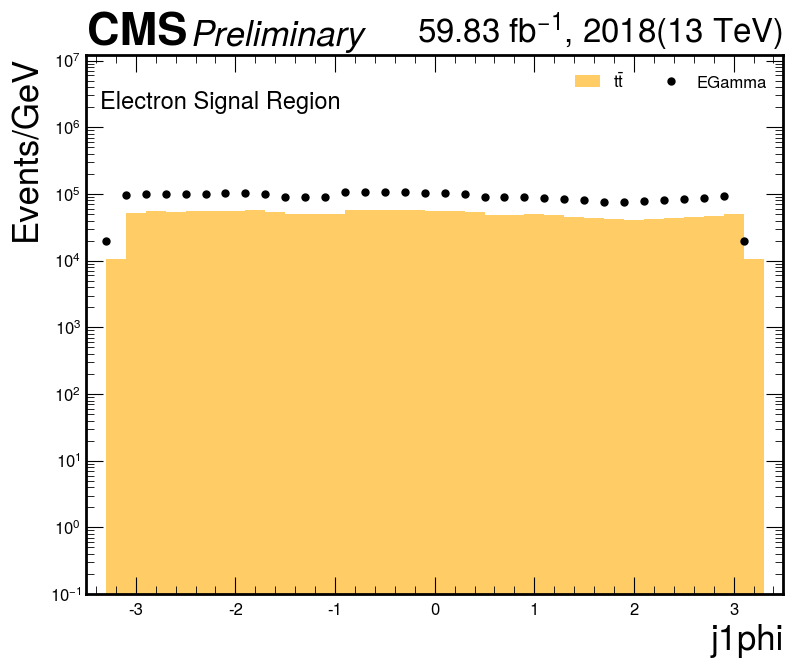

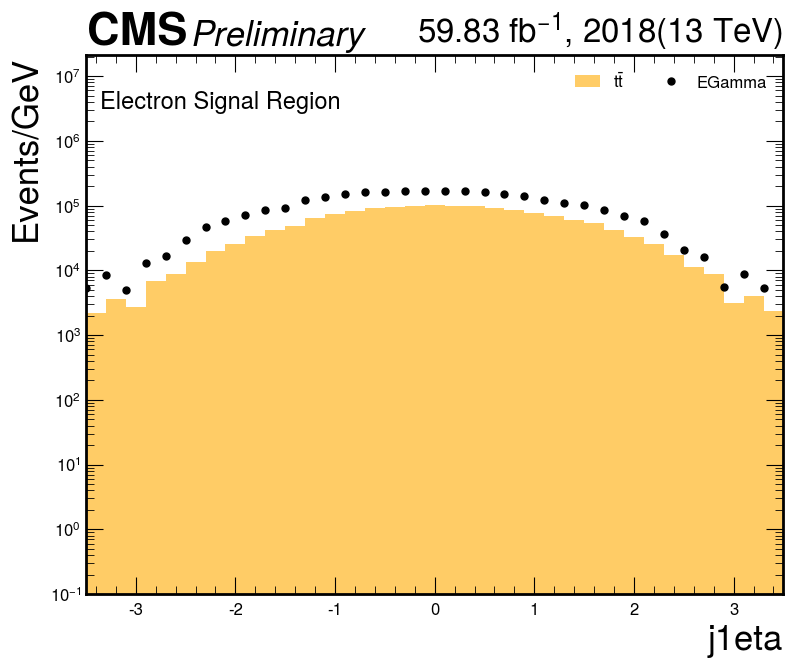

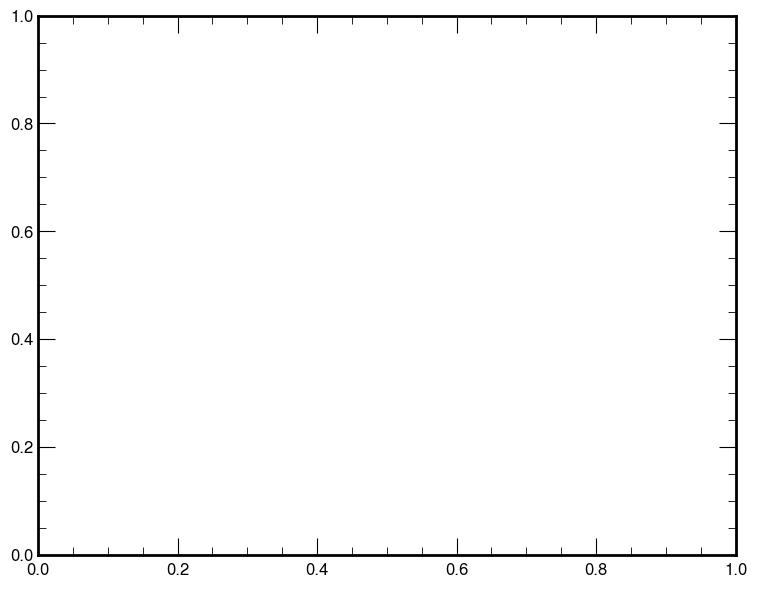

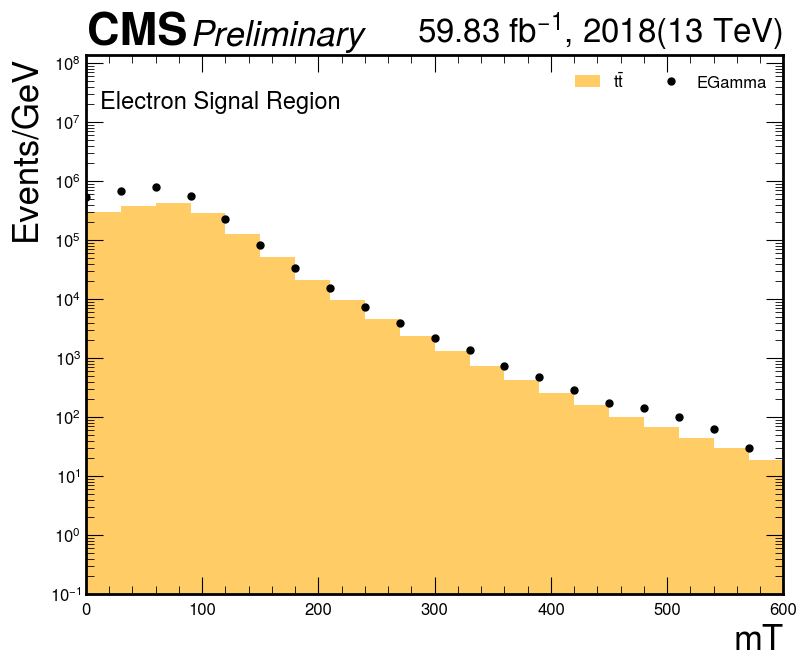

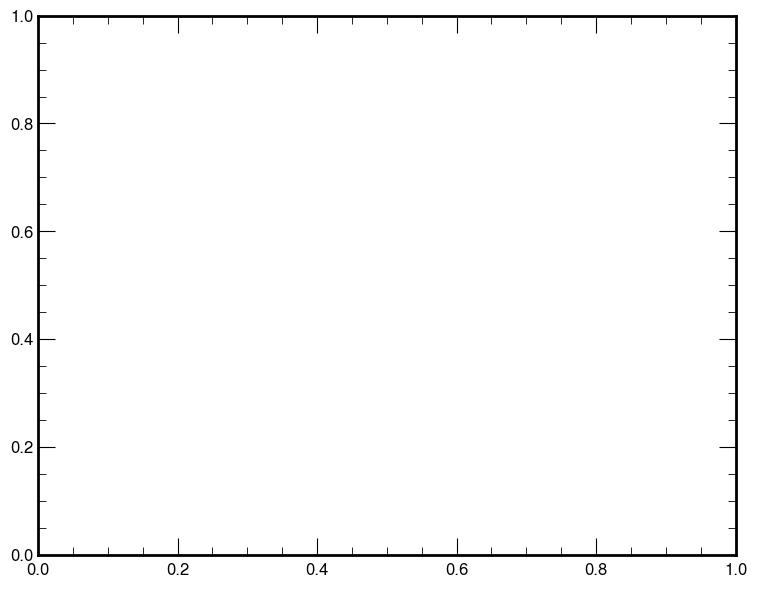

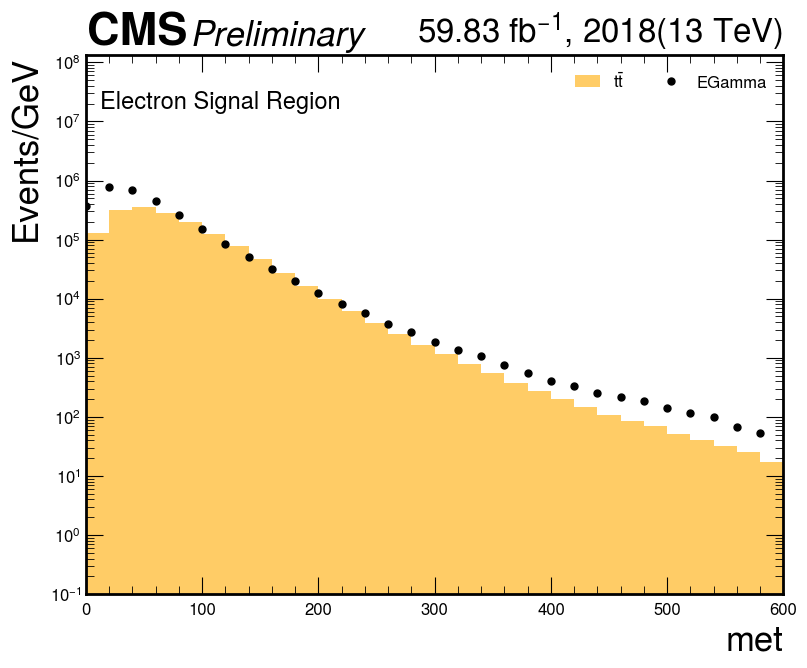

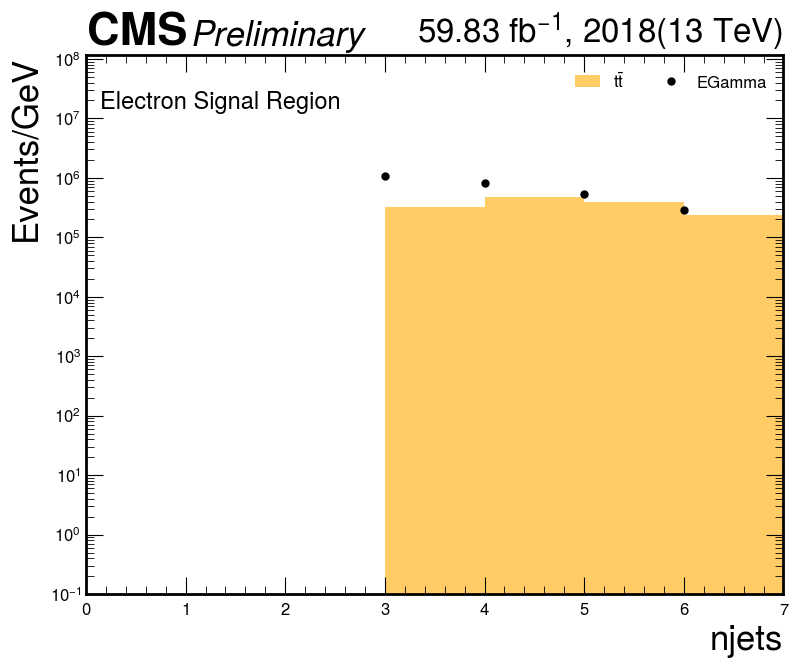

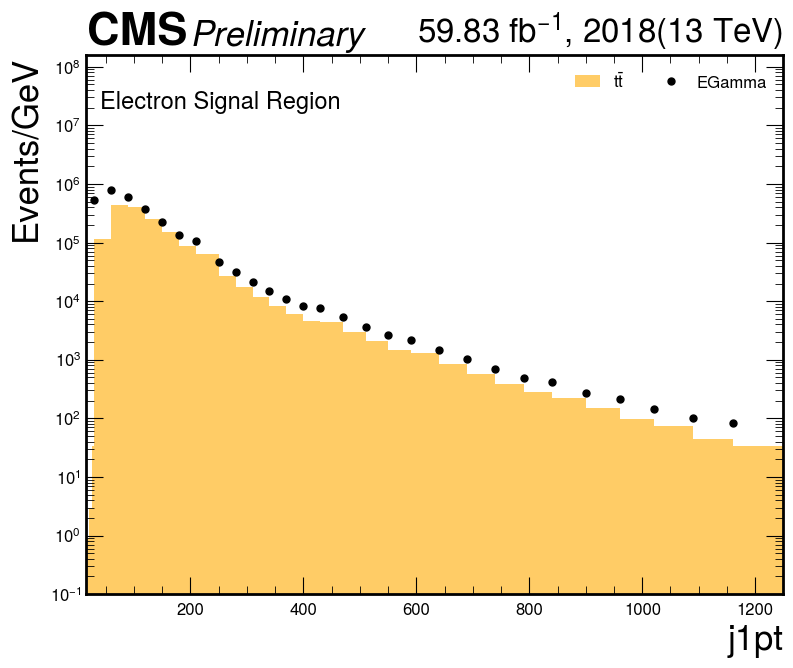

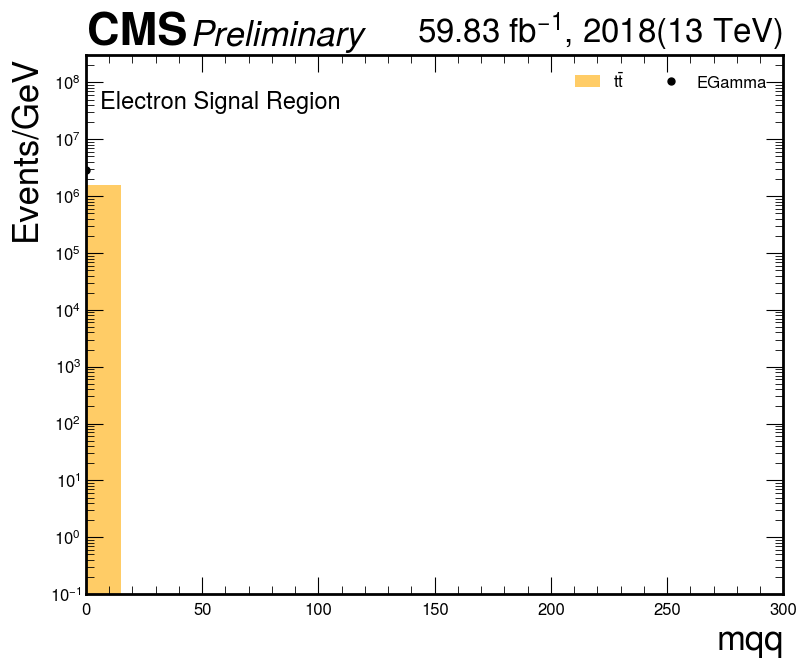

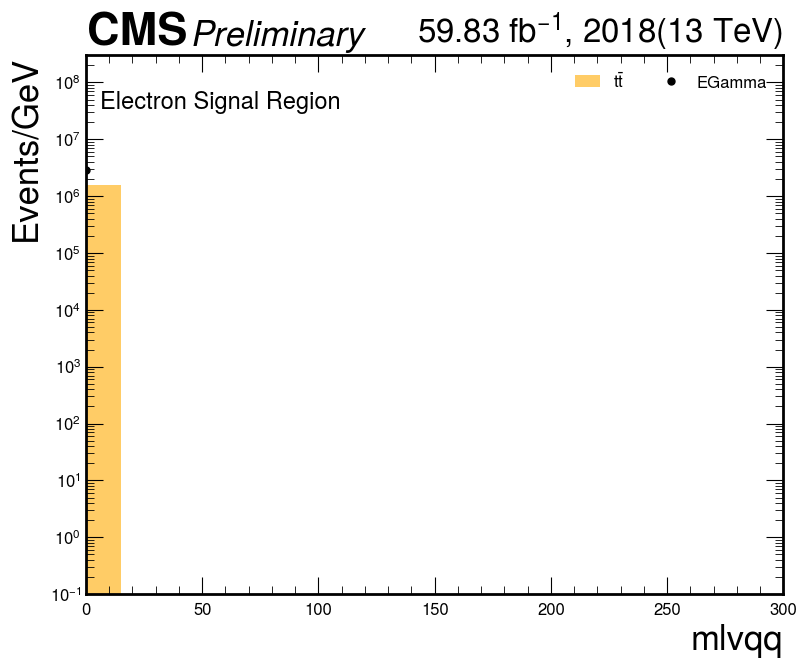

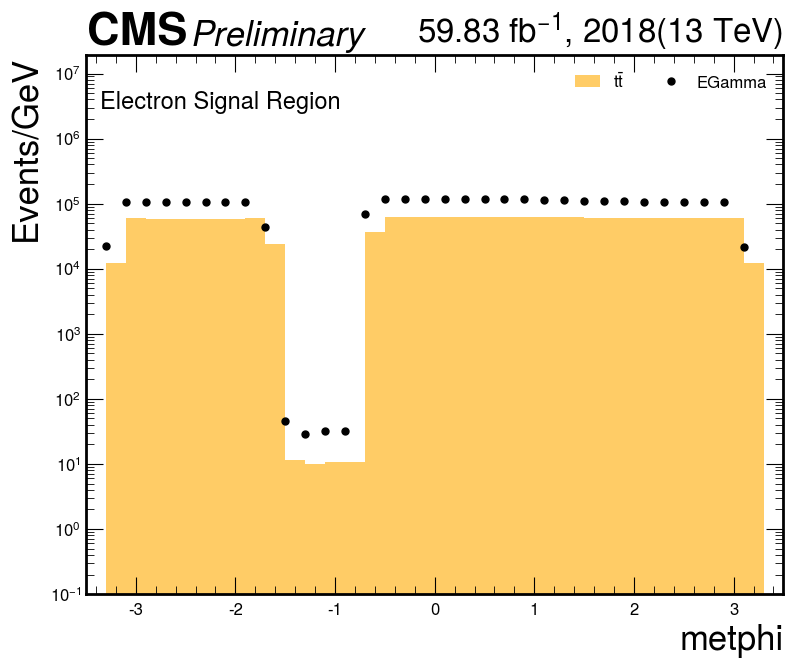

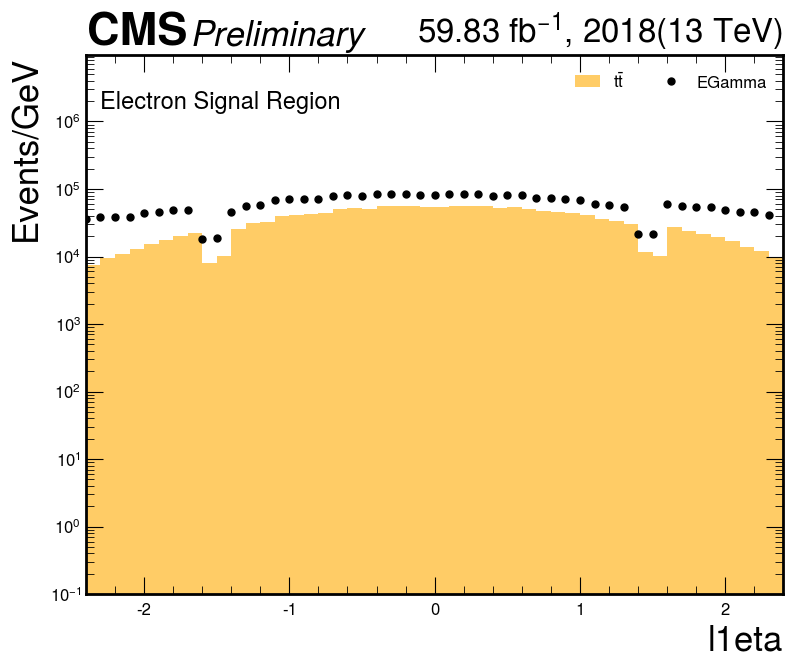

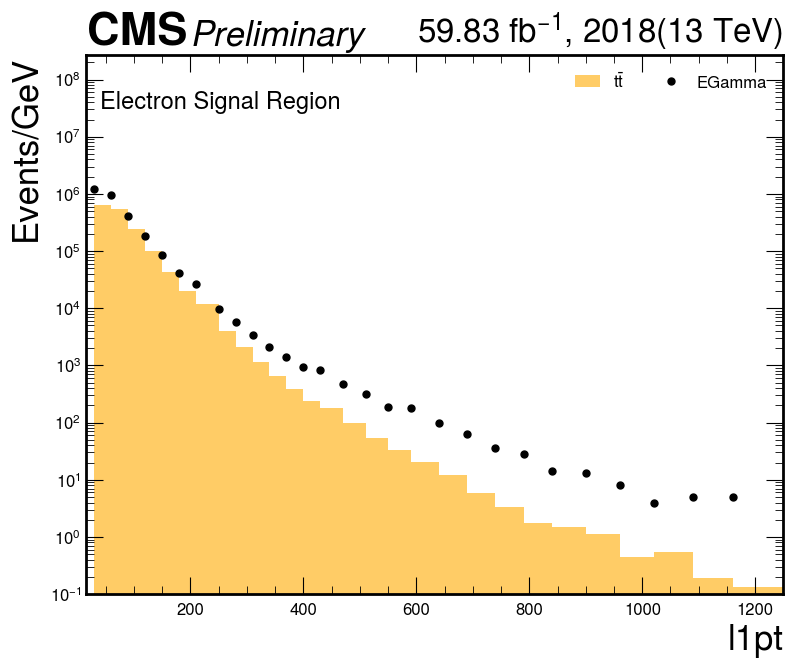

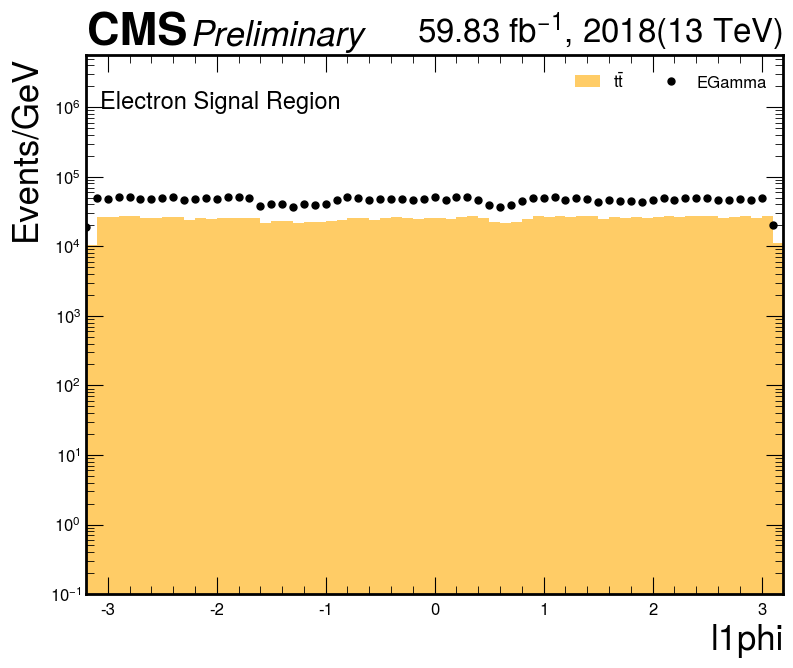

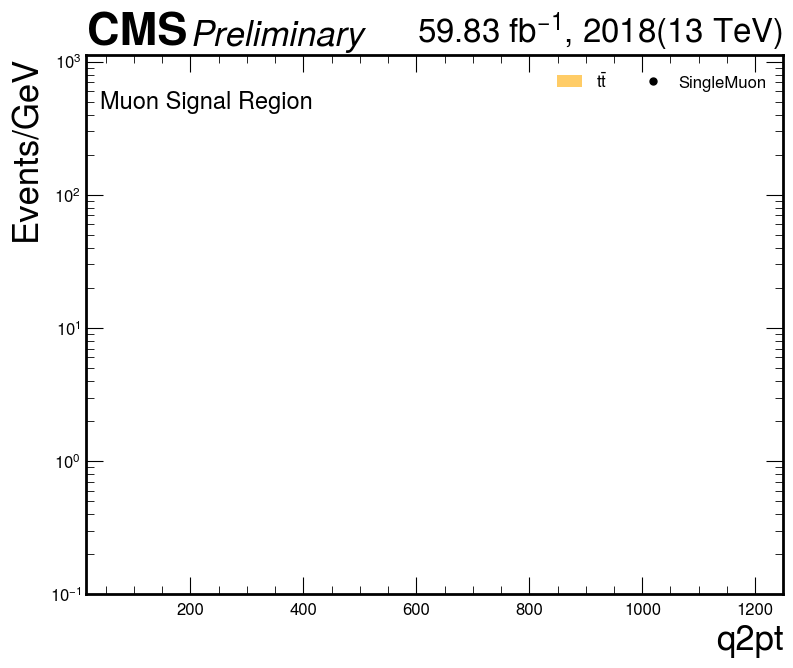

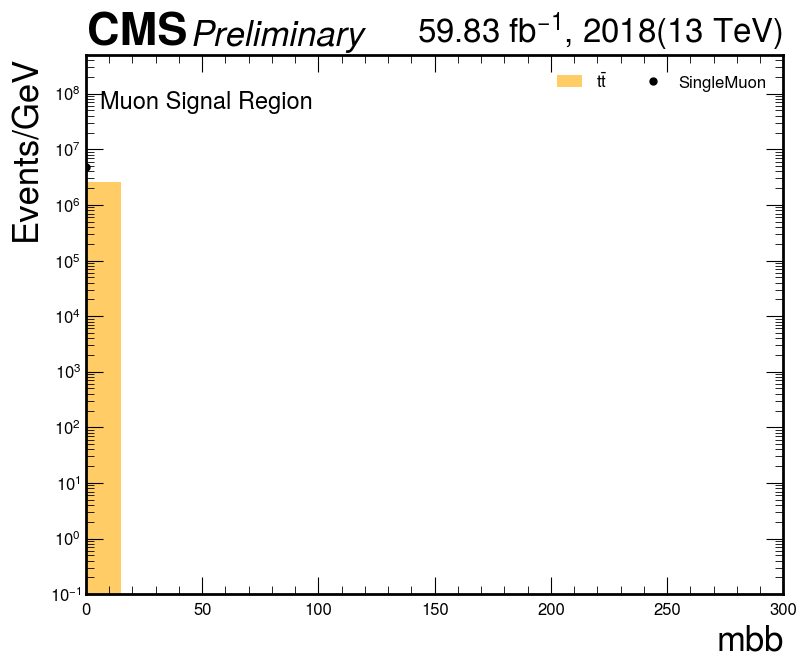

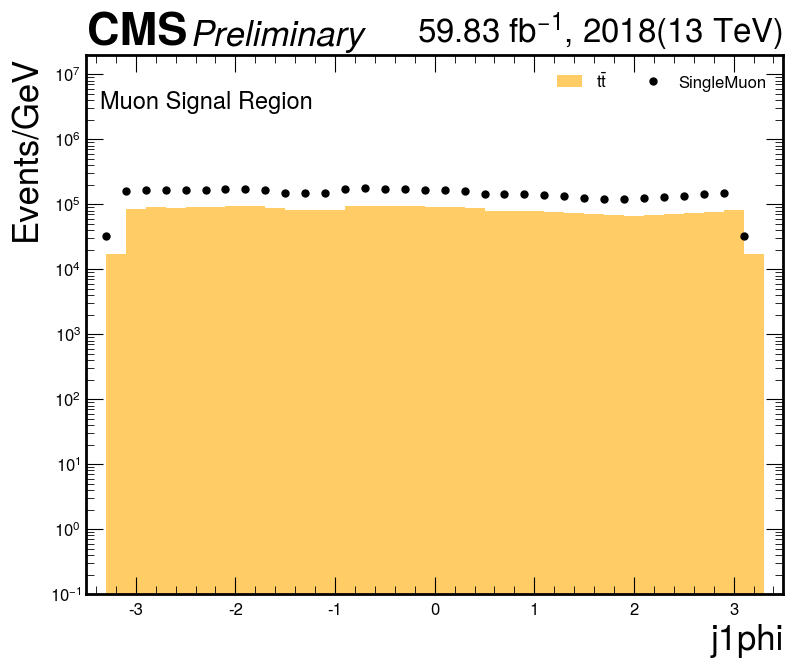

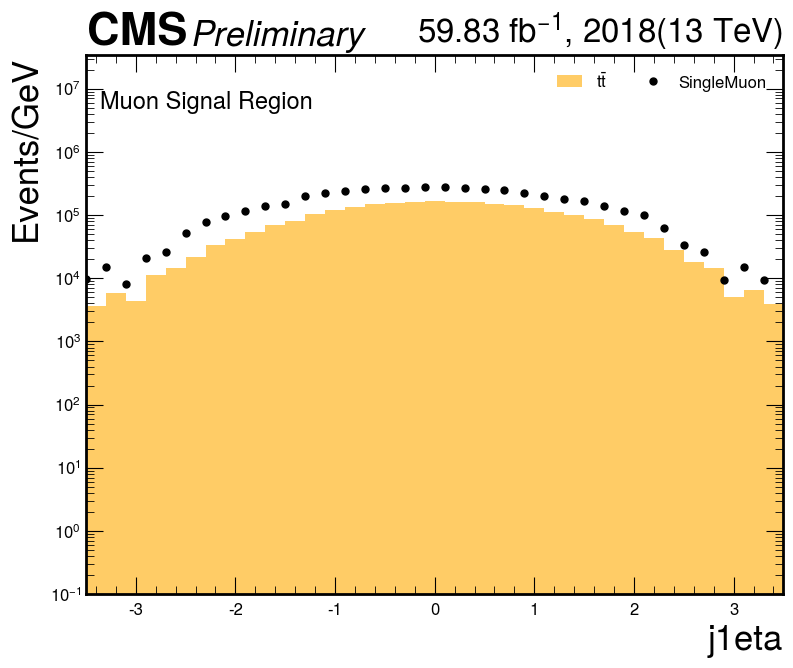

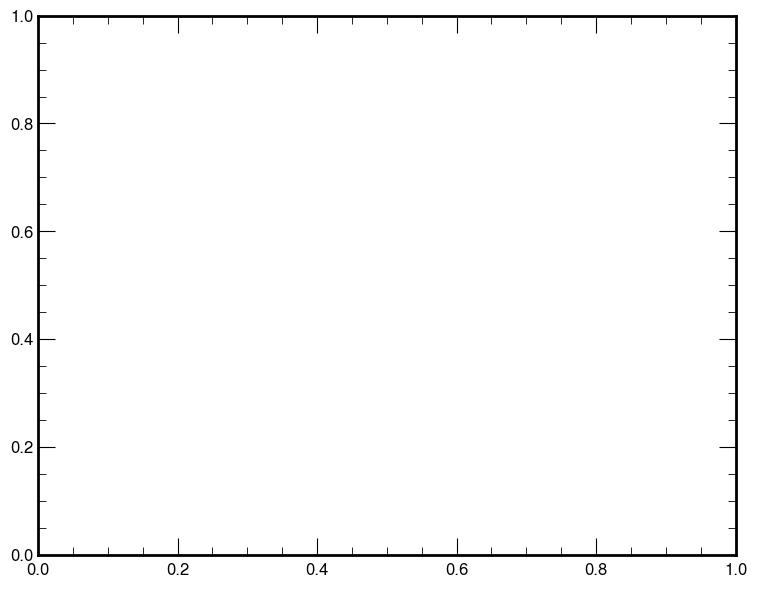

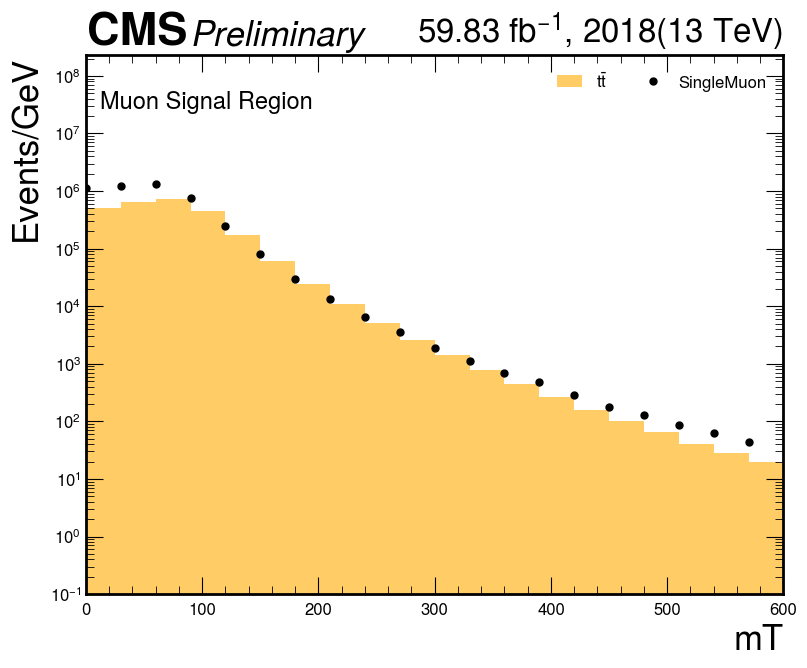

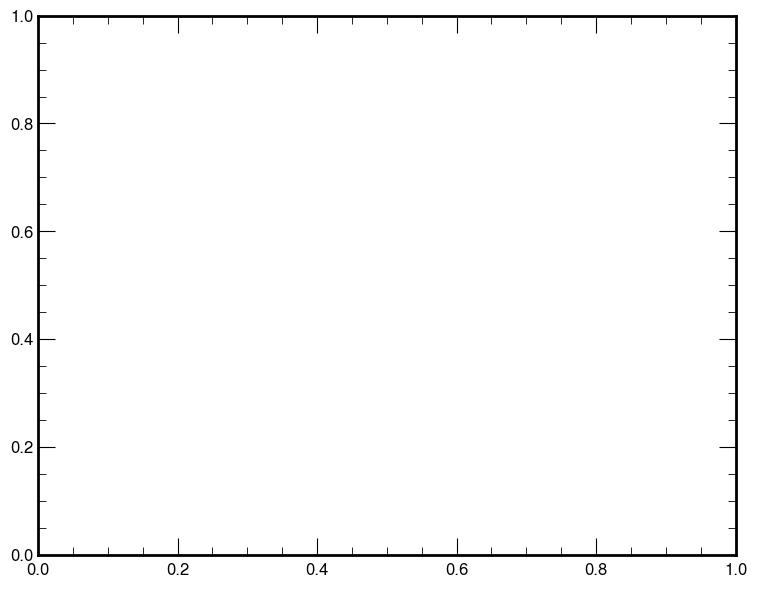

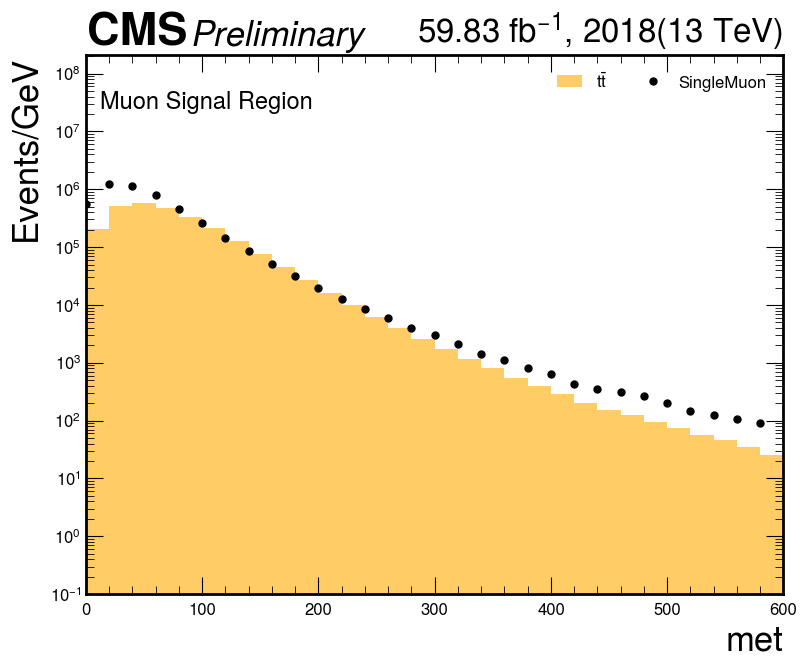

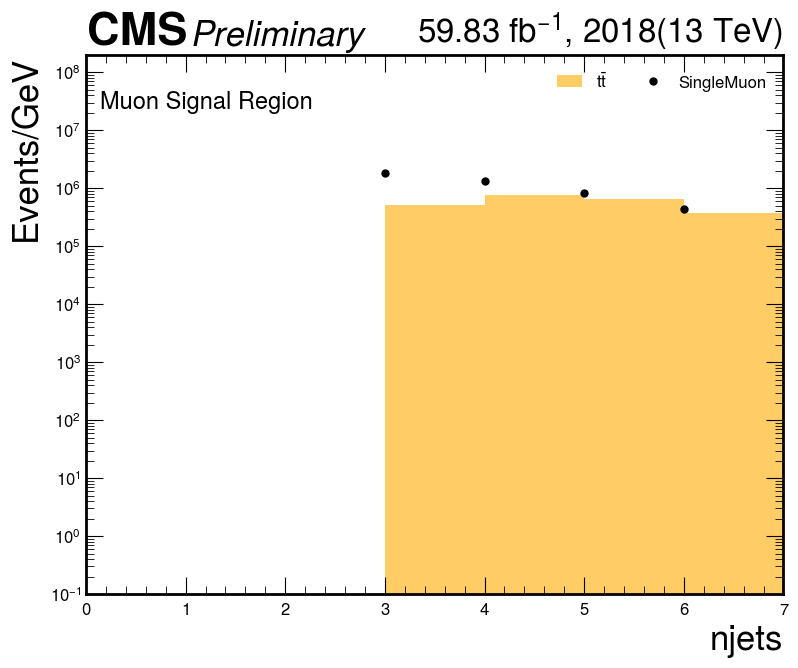

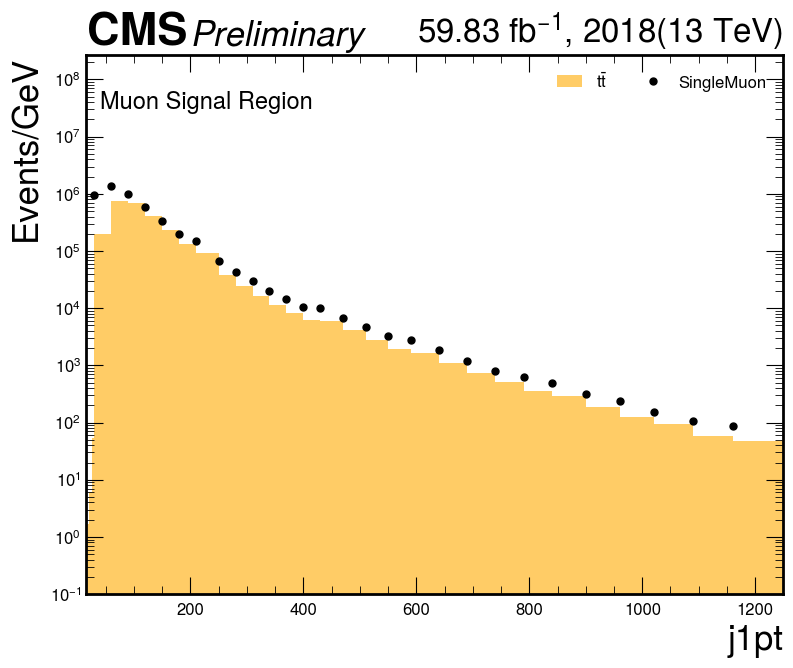

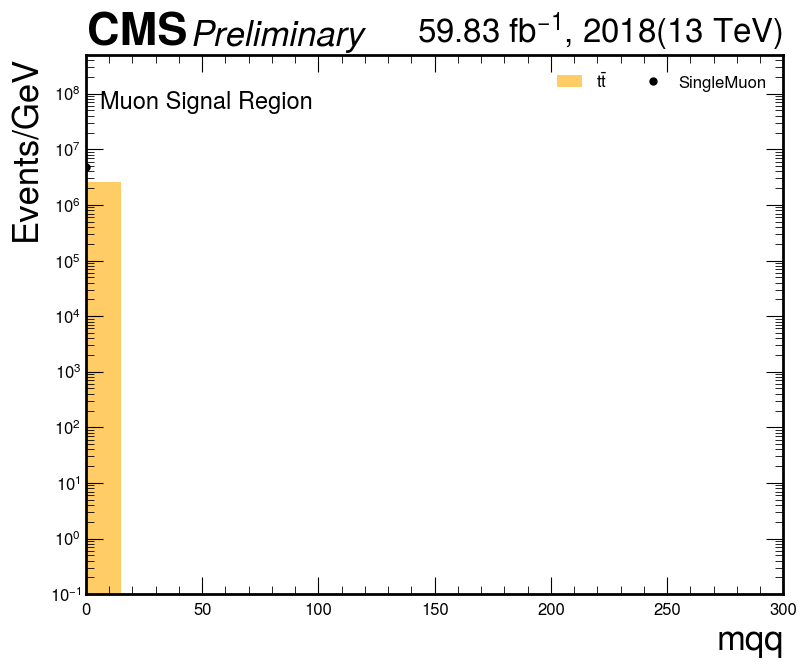

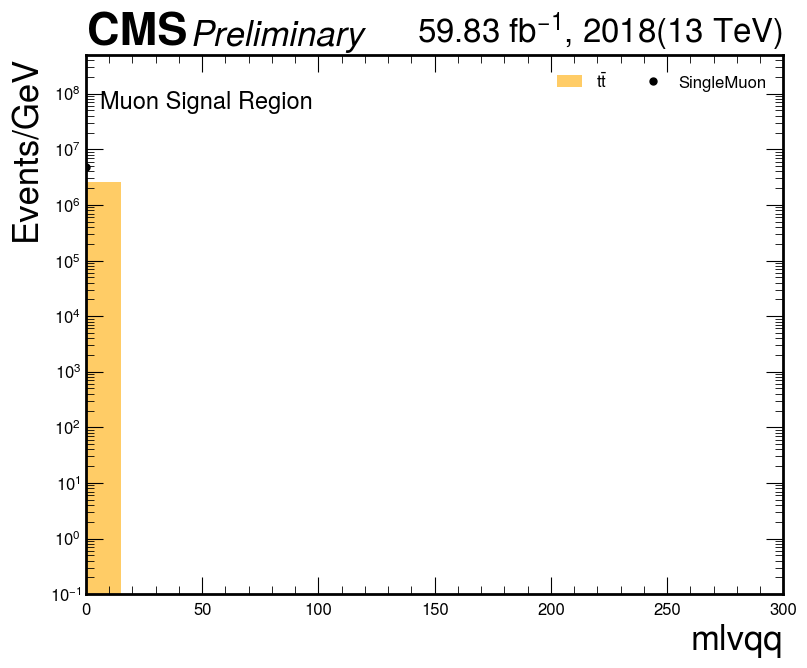

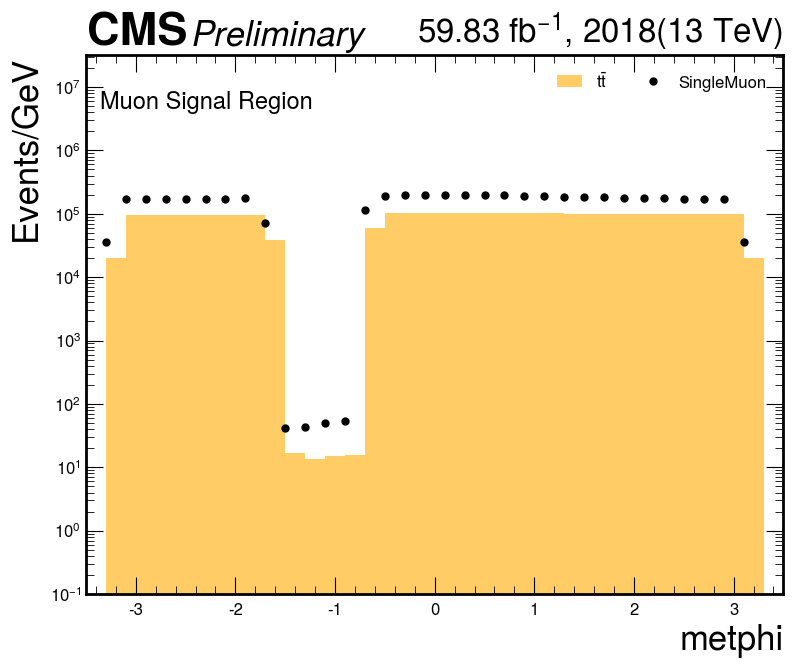

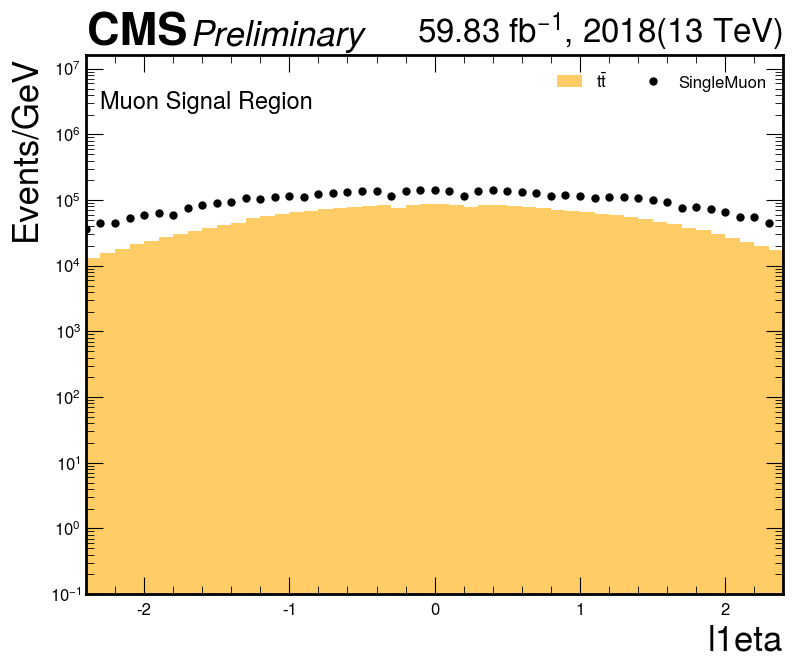

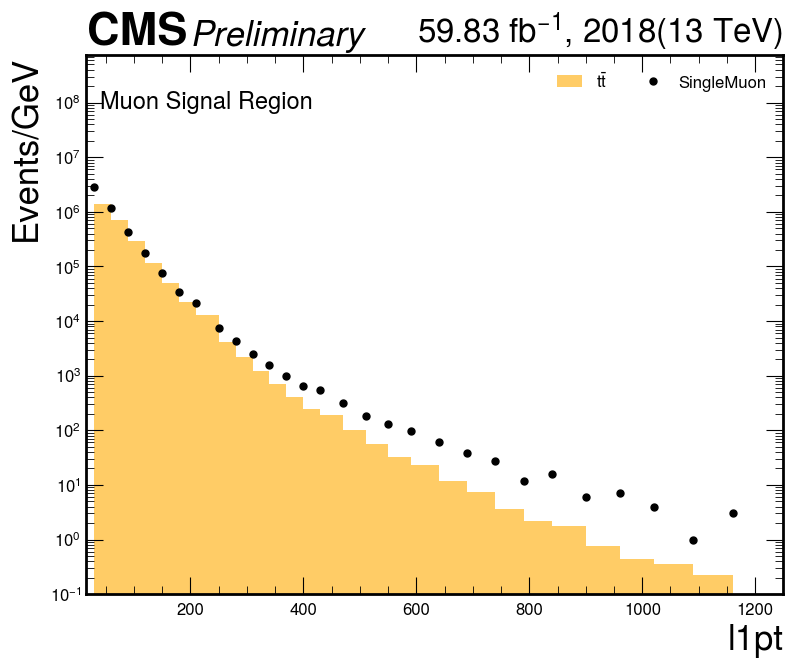

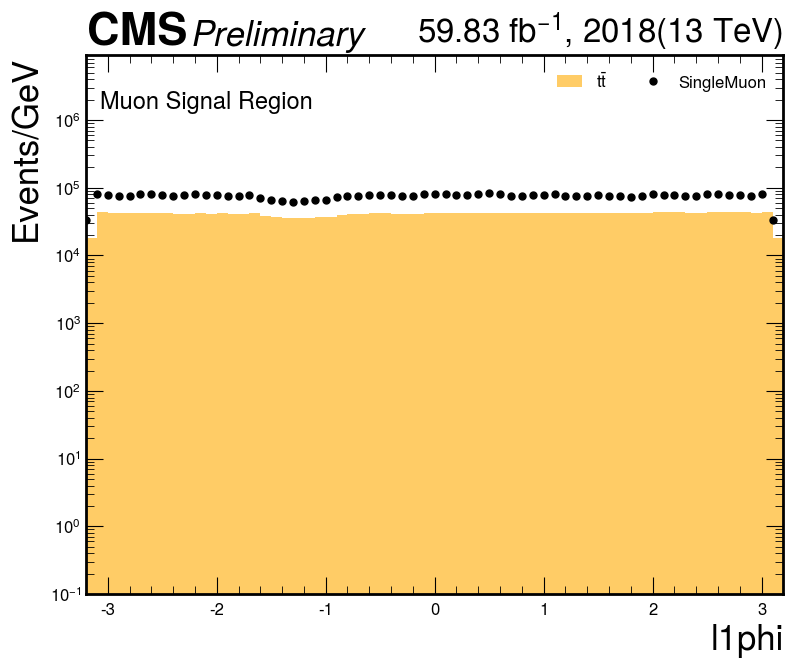

In [51]:
colorDict = {
    'DY+jets': '#e5ccff',
    r'$H\rightarrow b\bar{b}$':'#ccccff',
    'QCD': '#ffccff',
    'Diboson': '#ffff99',
    'Single t': '#ff9999',
    r"$t\bar{t}$": '#ffcc66',
    'W+jets': '#ccffcc',
    'Z+jets':'#99ffff'
}
regionindx = {'esr': 0, 'msr': 1}
regiondict={'esr': ['TT', 'SingleElectron, EGamma'], 
            'msr': ['TT', 'SingleMuon']}

regionnames = {'esr': 'Electron Signal Region', 'msr': 'Muon Signal Region'}
bkg_map = {'TT': r"$t\bar{t}$"}
for region in regiondict.keys():
    #fig.subplots_adjust(hspace=.07)
    for variable in bkg_hists.keys():
        plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
        fill_opts = {'edgecolor': 'none', 'alpha': 1}
        error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
        data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
        colors = ['#99ffff', '#ccffcc', '#ffcc66', '#ff9999', '#ffff99', '#ffccff', '#ccccff','#e5ccff']
        fig, ax = plt.subplots(1, 1, figsize=(9,7))
        if variable == 'sumw':continue
        if variable=='ndflvM': continue
        bkg_hists_var = bkg_hists[variable]
        data_hists_var = data_hists[variable]
        bkg_arr = bkg_hists_var['TT'][{'region': str(region)}].to_numpy()
        bkg_counts = bkg_arr[0]
        bkg_bins = bkg_arr[1]
        data_arr = data_hists_var[data[year][region]][{'region': str(region)}].to_numpy()
        data_counts = data_arr[0]
        data_bins = data_arr[1]
        plt.hist(bkg_bins[:-1], bins=bkg_bins, weights=bkg_counts, label=bkg_map['TT'], color=colorDict[bkg_map['TT']], **fill_opts)
        plt.errorbar(data_bins[:-1], data_counts, label=data[year][region], **data_err_opts)
        process1 = data[year][region]
        process2 = 'TT'
        ymax=abs(ax.get_ylim()[1])*1.1
        ymin=1.-(ymax-1.)
        ax.set_ylabel('Events/GeV',fontsize=25)
        ax.set_xlabel(variable,fontsize=25)
        #ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
        args = {'linestyle':'--', 'linewidth': 5}
        ax.autoscale(axis='x', tight=True)
        ax.set_yscale('log')
        ax.set_ylim(.1, ax.get_ylim()[1]*100.)
        ax.legend(loc='upper right', fontsize=12, ncol=2)
        #handles, labels = ax.get_legend_handles_labels()
        #order = list(range(len(labels)-1))
        #order.insert(0, len(labels)-1)
        #ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order],
                 #loc='upper right', fontsize=12, ncol=2)
        ax.text(s = regionnames[region],x=0.02,y=0.90, fontsize=17,transform=ax.transAxes)
        hep.cms.text(ax=ax, loc=0, text='Preliminary',fontsize=25)
        hep.cms.lumitext(ax=ax, text=str(lumi)+r" fb$^{-1}$, "+ str(year) + '(13 TeV)',fontsize=25)
        plt.show()


